***AJIO Data Analysis by using Python (eCommerce) ***

**Problem Statement**

Ajio, a leading fashion eCommerce platform, aims to enhance its customer experience, operational efficiency, and product strategy byleveraging data-driven insights. The challenges aligns in understanding customer buying behavior, optimizing product offerings andidentifying issues related to returns, delivery delays, and payment failures.
To address these gaps, an in-depth Exploratory Data Analysis (EDA) of the Ajio dataset—which includes customer, order, product, rating,transaction, delivery, and return data—is essential. This analysis will uncover key trends, patterns, and anomalies, enabling data-backeddecisions that improve customer retention, reduce operational inefficiencies for future growth to increase overall profitability.

**Objectives**

🎯 1. Understand Customer Behavior and Segmentation and improve customer retention.
🎯 2. Optimize inventory, pricing, and product placement strategies.
🎯 3. Enhance supply chain reliability and customer satisfaction.


#Importing libraries


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Load the datasets



In [5]:
customers = pd.read_csv("customer.csv")
delivery = pd.read_csv("delivery.csv")
ratings = pd.read_csv("ratings.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transaction.csv")
returns = pd.read_csv("returns.csv")

In [6]:
customers.head()

,C_ID,C_Name,Gender,Age,City,State,Street_Address,Mobile
0,CS_11000000,Manikya Devan,Male,34,Patna,Rajasthan,"86/73, Bali Zila",8361546676336
1,CS_11000001,Mehul Devi,Female,26,Pudukkottai,Madhya Pradesh,"H.No. 02, Ghose Circle",8809879889671
2,CS_11000002,Azad Tandon,Male,50,Rajkot,Bihar,"87, Som Ganj",850564567002
3,CS_11000003,Vivaan Gupta,Male,37,Jammu,Gujarat,"H.No. 052, Banik Chowk",1995186073427
4,CS_11000004,Neelofar Jani,Male,30,Munger,Karnataka,"93, Korpal Path",9810481828645


#Check for data types


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Or_ID       5000 non-null   object
 1   C_ID        5000 non-null   object
 2   P_ID        5000 non-null   object
 3   Order_Date  5000 non-null   object
 4   Order_Time  5000 non-null   object
 5   Qty         5000 non-null   int64 
 6   Coupon      5000 non-null   object
 7   DP_ID       5000 non-null   object
 8   Discount    5000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 351.7+ KB


In [8]:
orders.describe()

,Qty,Discount
count,5000.000000,5000.000000
mean,4.994400,18.235000
std,2.594863,15.371631
min,1.000000,0.000000
25%,3.000000,5.000000
50%,5.000000,15.000000
75%,7.000000,25.000000
max,9.000000,50.000000


#To check for duplicates in your dataframe


In [42]:
orders.duplicated().sum()
transactions.duplicated().sum()
customers.duplicated().sum()
ratings.duplicated().sum()
delivery.duplicated().sum()
products.duplicated().sum()
returns.duplicated().sum()

np.int64(0)

#If there are any duplicated value then use


In [12]:
orders = orders.drop_duplicates()
transactions = transactions.drop_duplicates()
customers = customers.drop_duplicates()
ratings = ratings.drop_duplicates()
delivery = delivery.drop_duplicates()
products = products.drop_duplicates()
returns = returns.drop_duplicates()
orders.isnull().sum()

,0
Or_ID,0
C_ID,0
P_ID,0
Order_Date,0
Order_Time,0
Qty,0
Coupon,0
DP_ID,0
Discount,0


In [14]:
#bfill
customers.head(5)

,C_ID,C_Name,Gender,Age,City,State,Street_Address,Mobile
0,CS_11000000,Manikya Devan,Male,34,Patna,Rajasthan,"86/73, Bali Zila",8361546676336
1,CS_11000001,Mehul Devi,Female,26,Pudukkottai,Madhya Pradesh,"H.No. 02, Ghose Circle",8809879889671
2,CS_11000002,Azad Tandon,Male,50,Rajkot,Bihar,"87, Som Ganj",850564567002
3,CS_11000003,Vivaan Gupta,Male,37,Jammu,Gujarat,"H.No. 052, Banik Chowk",1995186073427
4,CS_11000004,Neelofar Jani,Male,30,Munger,Karnataka,"93, Korpal Path",9810481828645


In [15]:
orders.head(5)

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount
0,OR_31000000,CS_11000604,PD_21000191,2024-05-31 12:07:38.011602320,05:29:06,7,WINDOW,DV_61000000,20
1,OR_31000001,CS_11000405,PD_21000170,2023-10-05 00:25:03.660732148,23:41:08,7,No Coupon,DV_61000001,0
2,OR_31000002,CS_11000231,PD_21000016,2023-02-09 17:16:43.160632126,00:53:55,7,AGREEMENT,DV_61000002,10
3,OR_31000003,CS_11000532,PD_21000120,2024-08-19 19:42:45.873174632,14:33:08,6,PULL,DV_61000003,5
4,OR_31000004,CS_11000818,PD_21000186,2023-07-05 17:58:46.545309062,19:42:57,8,WINDOW,DV_61000004,50


#to join two tables together, merge function is used


In [16]:
merged_customer_orders = pd.merge(right = customers, left = orders, how = "inner", on = "C_ID")
merged_customer_orders.head()

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount,C_Name,Gender,Age,City,State,Street_Address,Mobile
0,OR_31000000,CS_11000604,PD_21000191,2024-05-31 12:07:38.011602320,05:29:06,7,WINDOW,DV_61000000,20,Amira Wason,Male,37,Hyderabad,Madhya Pradesh,30\nBhat Marg,104791507487
1,OR_31000001,CS_11000405,PD_21000170,2023-10-05 00:25:03.660732148,23:41:08,7,No Coupon,DV_61000001,0,Tushar Ramachandran,Female,22,Hosur,Tamil Nadu,11/14\nKothari Path,6612062826400
2,OR_31000002,CS_11000231,PD_21000016,2023-02-09 17:16:43.160632126,00:53:55,7,AGREEMENT,DV_61000002,10,Nakul Seth,Female,43,Moradabad,Karnataka,33/353\nHalder Marg,2420425137317
3,OR_31000003,CS_11000532,PD_21000120,2024-08-19 19:42:45.873174632,14:33:08,6,PULL,DV_61000003,5,Siya Mane,Male,19,Kottayam,Gujarat,02/380\nRanganathan Nagar,72301340225
4,OR_31000004,CS_11000818,PD_21000186,2023-07-05 17:58:46.545309062,19:42:57,8,WINDOW,DV_61000004,50,Shalv Amble,Female,35,Bareilly,Gujarat,"11, Yadav Zila",5075177574695


#group by is used to summarise data i.e. it creates pivot tables


In [17]:
gb = merged_customer_orders.groupby("State").agg({"Or_ID":"count"})
gb = gb.sort_values(by = "Or_ID", ascending=False)
gb

,Or_ID
State,
Delhi,594
Tamil Nadu,543
Gujarat,518
Rajasthan,508
Karnataka,503
West Bengal,481
Madhya Pradesh,479
Maharashtra,468
Uttar Pradesh,458


#Visualize the name of the states from which customers mostly placed orders


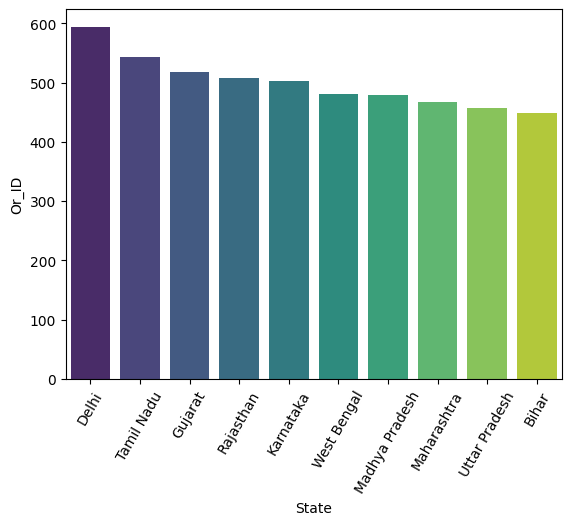

In [18]:
sns.barplot(x= gb.index, y= "Or_ID", data = gb, hue= gb.index, palette="viridis")
plt.xticks(rotation = 60)
plt.show()

In [19]:
products.head()

,P_ID,P_Name,Category,Company_Name,Gender,Price
0,PD_21000000,Inventore Jacket,Jacket,UCB,Women,2110
1,PD_21000001,Laudantium Hoodie,Hoodie,Puma,Unisex,2891
2,PD_21000002,Repudiandae Jeans,Footwear,UCB,Women,2996
3,PD_21000003,Ipsam Hoodie,T-shirt,Gap,Women,1847
4,PD_21000004,Adipisci T-shirt,Footwear,UCB,Unisex,2230


#Top Top-Selling Product Categories (by count)

/tmp/ipython-input-43-472495791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values,y=top_categories.index,palette='rocket')


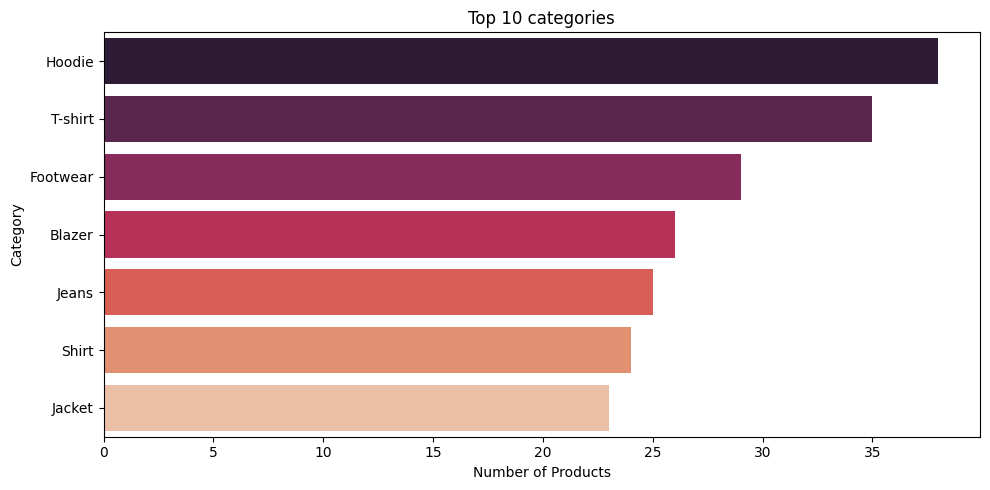

In [43]:
top_categories = products['Category'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.values,y=top_categories.index,palette='rocket')
plt.title('Top 10 categories')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

#Product Distribution Across Categories


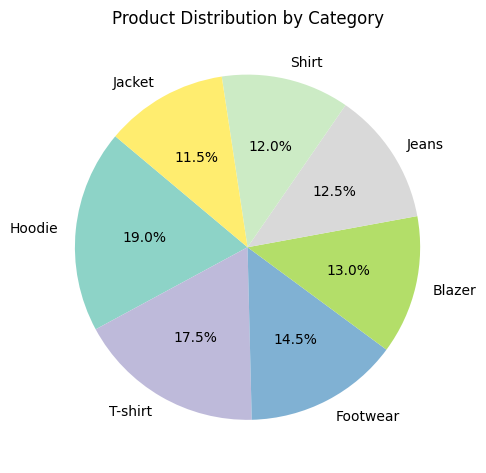

In [20]:
category_counts = products['Category'].value_counts()
plt.figure(figsize=(5,5))
category_counts.plot.pie(autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.ylabel('')
plt.title('Product Distribution by Category')
plt.tight_layout()
plt.show()

#Price distribution


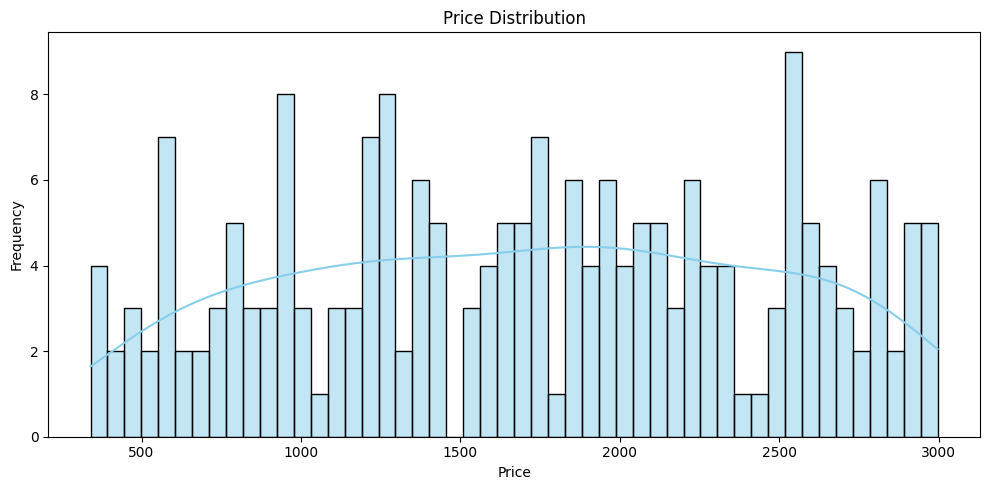

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(products['Price'], bins=50, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Or_ID       5000 non-null   object
 1   C_ID        5000 non-null   object
 2   P_ID        5000 non-null   object
 3   Order_Date  5000 non-null   object
 4   Order_Time  5000 non-null   object
 5   Qty         5000 non-null   int64 
 6   Coupon      5000 non-null   object
 7   DP_ID       5000 non-null   object
 8   Discount    5000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 351.7+ KB


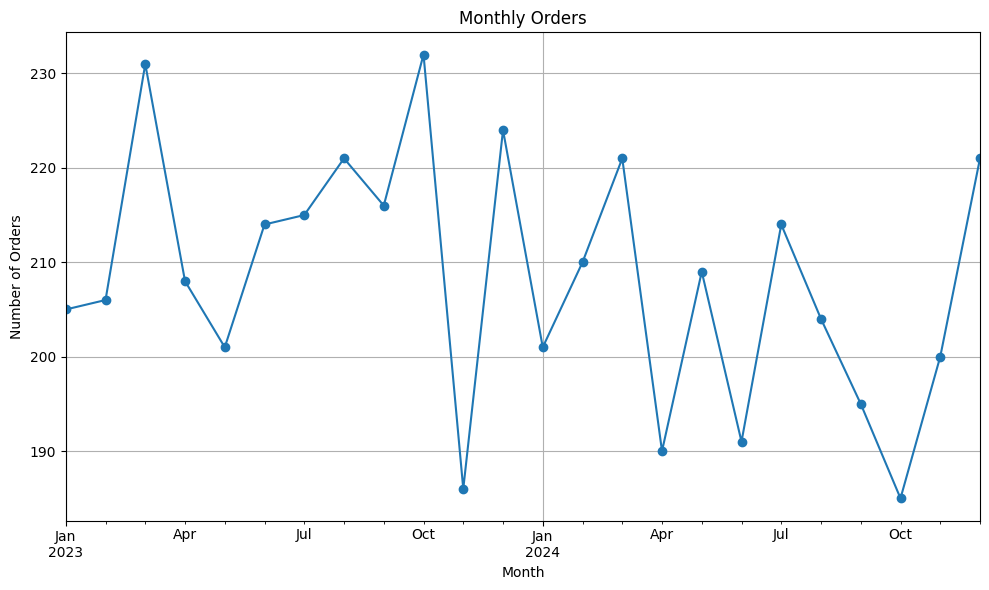

In [44]:
orders['Order_Date']= pd.to_datetime(orders['Order_Date'])
orders_monthly = orders.groupby(orders['Order_Date'].dt.to_period("M")).size()
orders_monthly.index = orders_monthly.index.to_timestamp()

plt.figure(figsize=(10,6))
orders_monthly.plot(marker='o',linestyle='-')
plt.title("Monthly Orders")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-46-2385670233.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_order_counts.index,y=day_order_counts.values,palette ='pastel')


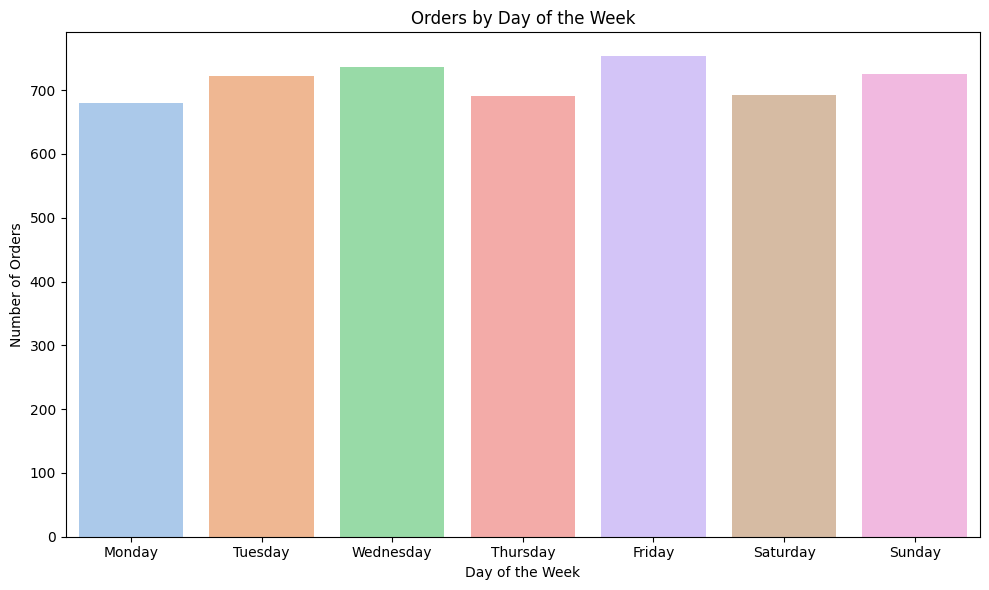

In [46]:
#
orders['day_of_week']= orders['Order_Date'].dt.day_name()
day_order_counts = orders['day_of_week'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(10,6))
sns.barplot(x=day_order_counts.index,y=day_order_counts.values,palette ='pastel')
plt.title("Orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

#Average Order Value (AOV)


In [23]:
aov = orders['Qty'].mean()
print("Average ORder Value (AOV): ${:.2f}".format(aov))

Average ORder Value (AOV): $4.99


#Distribution of monthly Average Order Value (AOV)


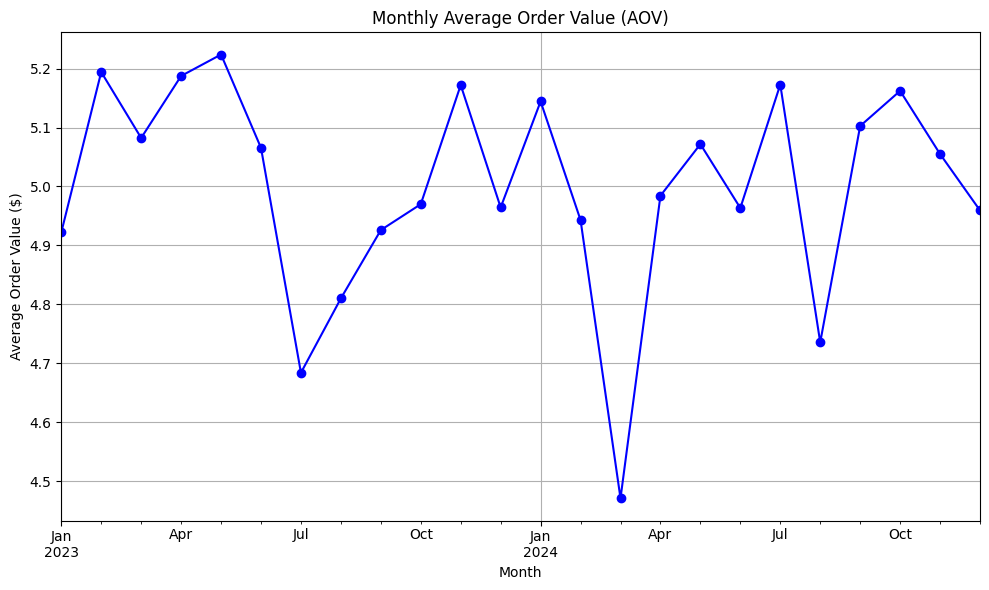

In [47]:
aov_monthly = orders.groupby(orders['Order_Date'].dt.to_period("M"))['Qty'].mean()
aov_monthly.index = aov_monthly.index.to_timestamp()
plt.figure(figsize=(10,6))
aov_monthly.plot(marker='o', linestyle='-', color='blue')
plt.title("Monthly Average Order Value (AOV)")
plt.xlabel("Month")
plt.ylabel("Average Order Value ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

#Check the outliers in Price


/tmp/ipython-input-25-3911932655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=products, palette='Set2')


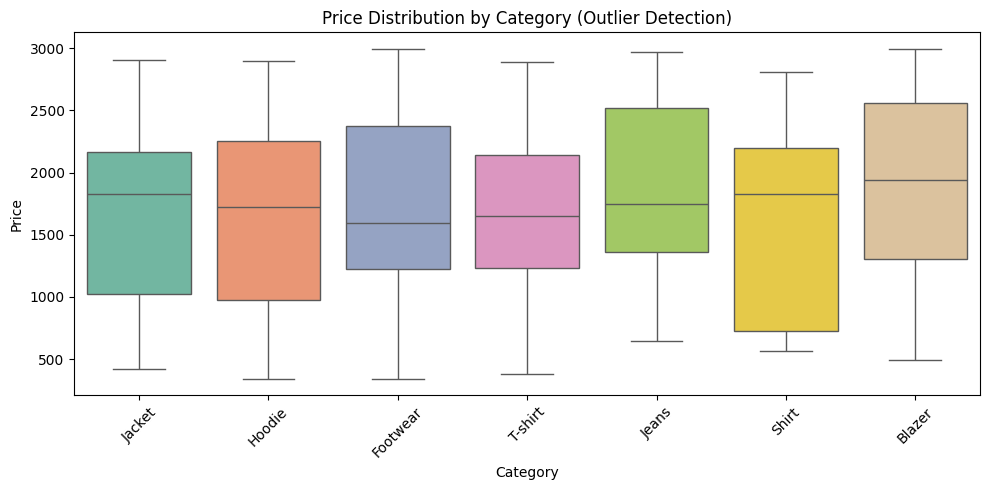

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Category', y='Price', data=products, palette='Set2')
plt.xticks(rotation=45)
plt.title('Price Distribution by Category (Outlier Detection)')
plt.tight_layout()
plt.show()

#Total unique customers


In [48]:
unique_customers = customers['C_ID'].nunique()
print(f"Total unique customers:{unique_customers}")

Total unique customers:1000


#Distribution of customers by state, gender and age group---



In [49]:
state_counts = customers['State'].value_counts()
gender_counts = customers['Gender'].value_counts()
bins =[0,18,25,35,50,65,100]
labels =['<18','18-24','25-34','35-49','50-64','65+']
customers['Age_Group']= pd.cut(customers['Age'],bins=bins,labels=labels,right=False)
age_group_counts = customers['Age_Group'].value_counts().sort_index()
print(state_counts,gender_counts,age_group_counts,sep="\n\n")

State
Delhi             111
Gujarat           111
Tamil Nadu        105
Karnataka         104
Maharashtra        97
Rajasthan          96
Madhya Pradesh     95
Bihar              95
West Bengal        93
Uttar Pradesh      93
Name: count, dtype: int64

Gender
Female    510
Male      490
Name: count, dtype: int64

Age_Group
<18        0
18-24    149
25-34    203
35-49    312
50-64    336
65+        0
Name: count, dtype: int64


#Visualiza distribution of customers based on State--


/tmp/ipython-input-51-1128506362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.values,y=state_counts.index,palette='Blues_r')


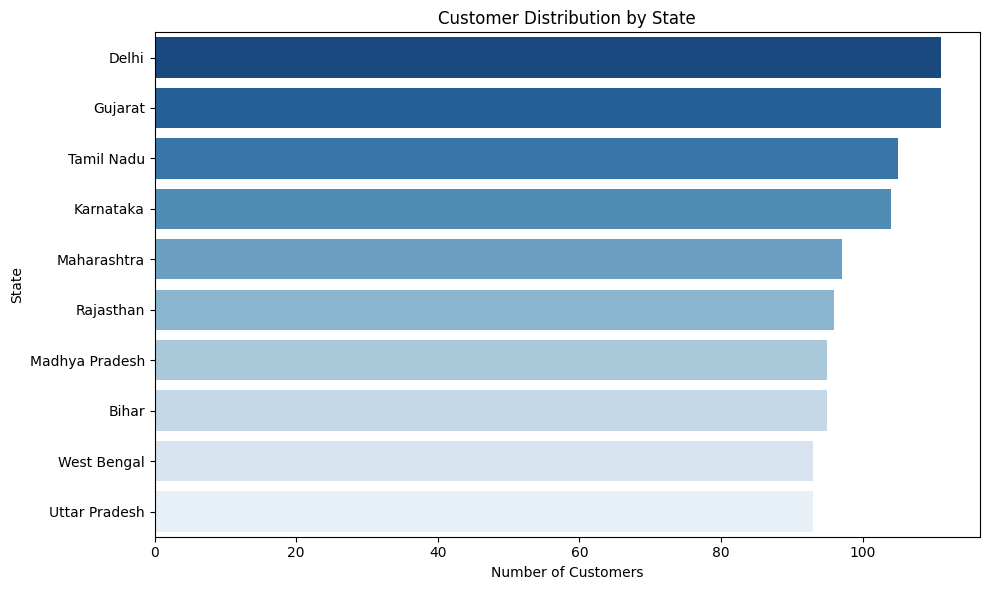

In [51]:

plt.figure(figsize=(10,6))
state_counts = customers['State'].value_counts()
sns.barplot(x=state_counts.values,y=state_counts.index,palette='Blues_r')
plt.title('Customer Distribution by State')
plt.xlabel('Number of Customers')
plt.ylabel('State')
plt.tight_layout()
plt.show()

#Visualiza distribution of customers based on Gender


/tmp/ipython-input-26-296349430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')


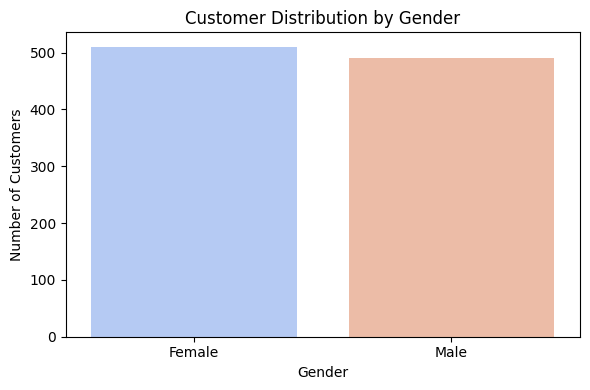

In [26]:
plt.figure(figsize=(6, 4))
gender_counts = customers['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')
plt.title('Customer Distribution by Gender')
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

#Visualiza distribution of customers based on age group


/tmp/ipython-input-27-924377071.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_dist.index, y=age_group_dist.values, palette='viridis')
/tmp/ipython-input-27-924377071.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_dist.index, y=age_group_dist.values, palette='viridis')


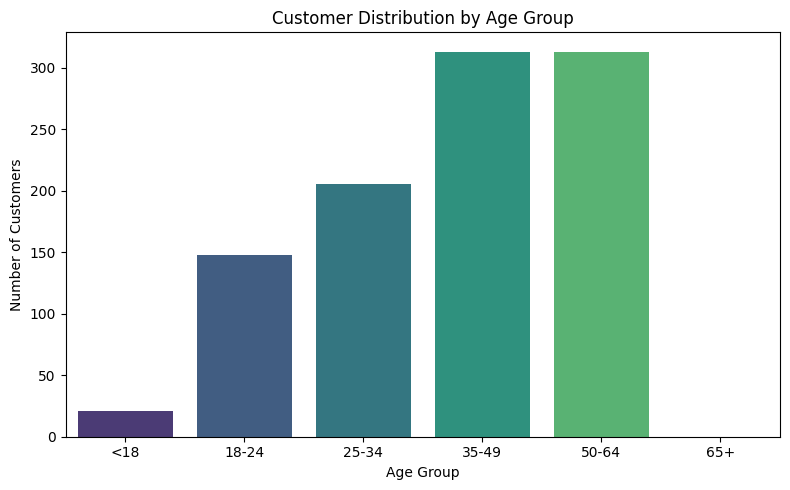

In [27]:
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['<18', '18-24', '25-34', '35-49', '50-64', '65+']
customers['age_group'] = pd.cut(customers['Age'], bins=bins, labels=labels)
plt.figure(figsize=(8, 5))
age_group_dist = customers['age_group'].value_counts().sort_index()
sns.barplot(x=age_group_dist.index, y=age_group_dist.values, palette='viridis')
sns.barplot(x=age_group_dist.index, y=age_group_dist.values, palette='viridis')
plt.title('Customer Distribution by Age Group')
plt.ylabel('Number of Customers')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

#Repeat purchase rate


In [28]:
customer_orders = orders.groupby('C_ID').size()
repeat_customers = customer_orders[customer_orders > 1].count()
total_customers = customers['C_ID'].nunique()
repeat_purchase_rate = repeat_customers / total_customers
print("Repeat purchase rate:", round(repeat_purchase_rate * 100, 2), "%")

Repeat purchase rate: 95.4 %


#Top 10 cities/states by customers count


In [29]:
top_cities = customers['City'].value_counts().head(10)
print("Top 10 Cities:\n", top_cities)

Top 10 Cities:
 City
Bhavnagar      9
Bidhannagar    9
Asansol        8
Parbhani       8
Farrukhabad    8
Burhanpur      8
Kollam         8
Adoni          7
Morena         7
Mehsana        7
Name: count, dtype: int64


In [30]:
top_states = customers['State'].value_counts().head(10)
print("\nTop 10 States:\n", top_states)


Top 10 States:
 State
Delhi             111
Gujarat           111
Tamil Nadu        105
Karnataka         104
Maharashtra        97
Rajasthan          96
Madhya Pradesh     95
Bihar              95
West Bengal        93
Uttar Pradesh      93
Name: count, dtype: int64


#Visualiza Top 10 cities/states by customers count


/tmp/ipython-input-31-992330865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='rocket')


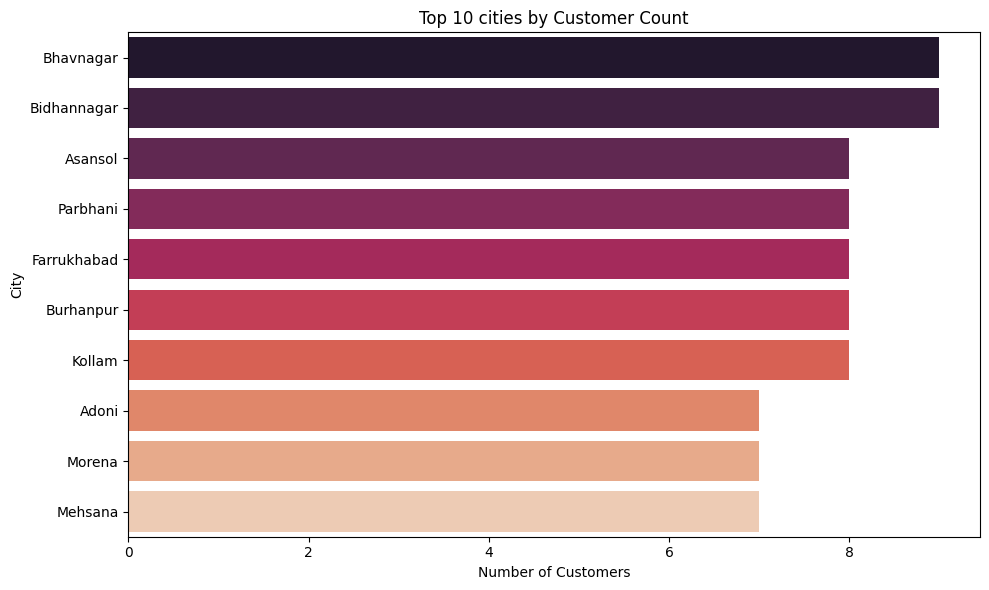

In [31]:
plt.figure(figsize=(10,6))
top_cities = customers['City'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='rocket')
plt.title('Top 10 cities by Customer Count')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [32]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Or_ID       5000 non-null   object
 1   C_ID        5000 non-null   object
 2   P_ID        5000 non-null   object
 3   Order_Date  5000 non-null   object
 4   Order_Time  5000 non-null   object
 5   Qty         5000 non-null   int64 
 6   Coupon      5000 non-null   object
 7   DP_ID       5000 non-null   object
 8   Discount    5000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 351.7+ KB


#Total Number of Orders Over Time


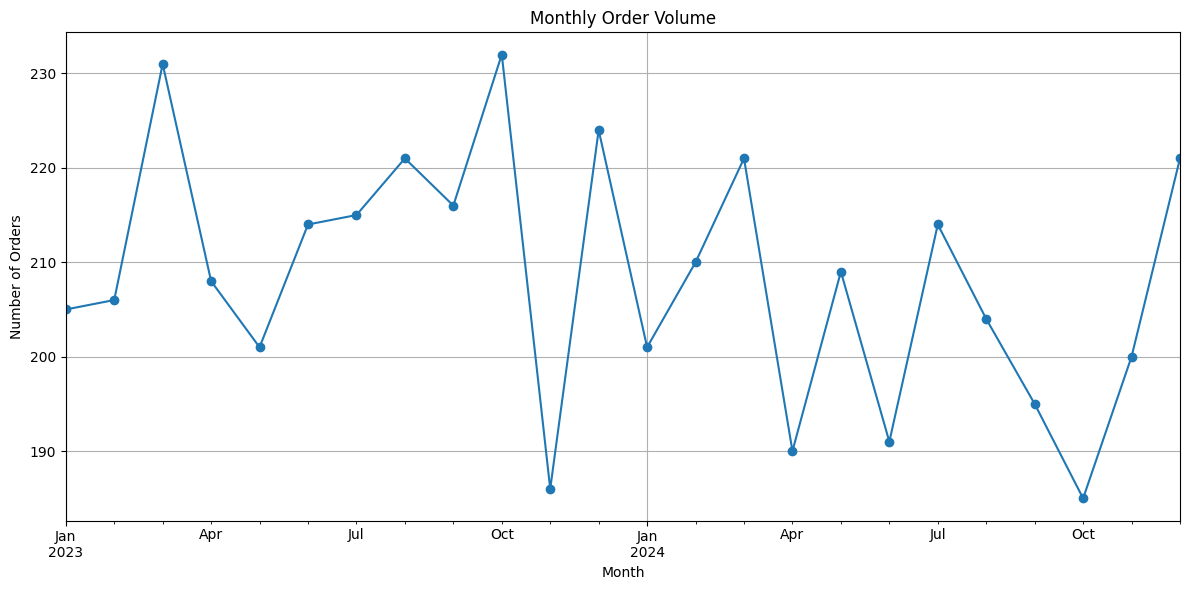

In [52]:
orders['Order_Date'] = pd.to_datetime(orders['Order_Date'])
orders_monthly = orders.groupby(orders['Order_Date'].dt.to_period("M")).size()
orders_monthly.index = orders_monthly.index.to_timestamp()
plt.figure(figsize=(12, 6))
orders_monthly.plot(marker='o', linestyle='-')
plt.title("Monthly Order Volume")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()

#Trend: Orders by Day of Week / Time of Day


/tmp/ipython-input-53-1654975920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_order_counts.index,y=day_order_counts.values,palette='pastel')


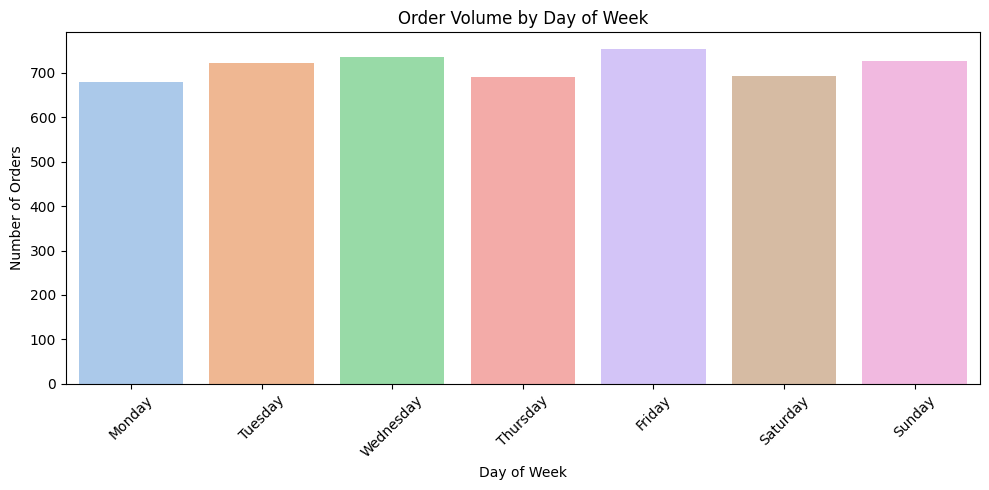

In [53]:
orders['day_of_week']= orders['Order_Date'].dt.day_name()
day_order_counts = orders['day_of_week'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(10,5))
sns.barplot(x=day_order_counts.index,y=day_order_counts.values,palette='pastel')
plt.title("Order Volume by Day of Week")
plt.ylabel("Number of Orders")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Average Order Value (AOV)


In [34]:
aov = orders['Qty'].mean()
print("Average Order Value (AOV): ${:.2f}".format(aov))

Average Order Value (AOV): $4.99


#Visualize AOV by Month:


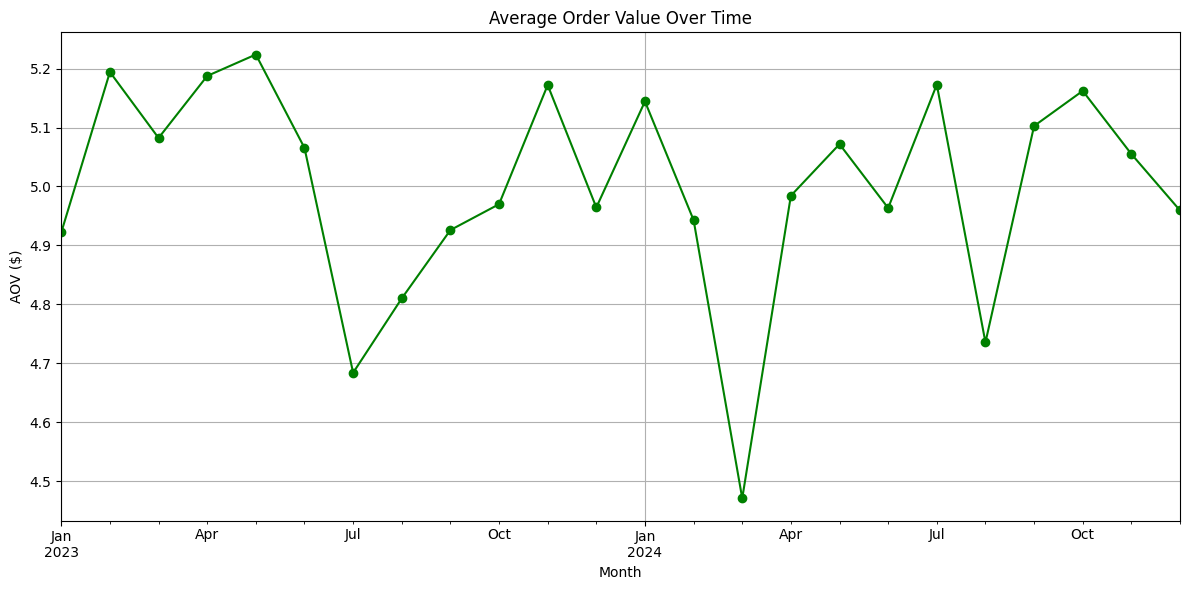

In [54]:
aov_monthly = orders.groupby(orders['Order_Date'].dt.to_period("M"))['Qty'].mean()
aov_monthly.index = aov_monthly.index.to_timestamp()
plt.figure(figsize=(12, 6))
aov_monthly.plot(marker='o', linestyle='-', color='green')
plt.title("Average Order Value Over Time")
plt.xlabel("Month")
plt.ylabel("AOV ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   R_ID                     5000 non-null   object
 1   Or_ID                    5000 non-null   object
 2   Prod_Rating              5000 non-null   int64 
 3   Delivery_Service_Rating  5000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 156.4+ KB


In [37]:
ratings.head()

,R_ID,Or_ID,Prod_Rating,Delivery_Service_Rating
0,RT_101000000,OR_31000000,2,2
1,RT_101000001,OR_31000001,4,3
2,RT_101000002,OR_31000002,3,5
3,RT_101000003,OR_31000003,1,3
4,RT_101000004,OR_31000004,3,2


In [55]:
avg_rating = ratings['Prod_Rating'].mean()
print("Average Rating: {:.2f}".format(avg_rating))

Average Rating: 3.00


#Rating Distribution


/tmp/ipython-input-56-3850641017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prod_Rating',data=ratings,palette='viridis')


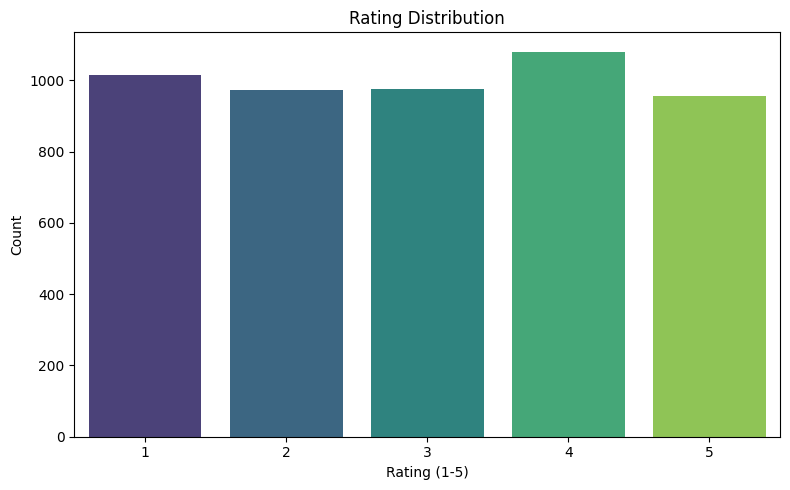

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x='Prod_Rating',data=ratings,palette='viridis')
plt.title("Rating Distribution")
plt.xlabel("Rating (1-5)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#Average rating by product category


/tmp/ipython-input-38-1267532875.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette='magma')


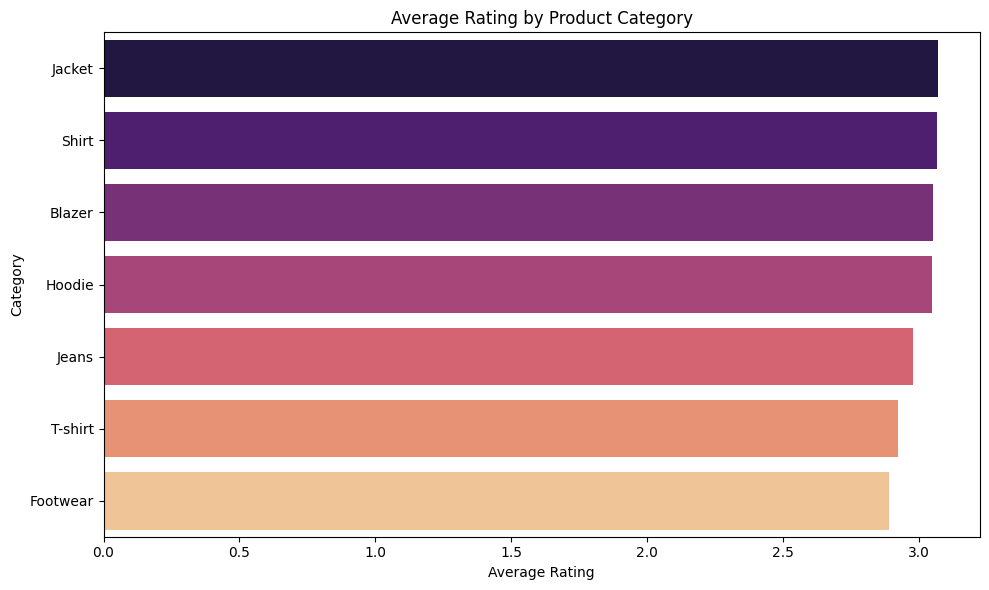

In [38]:
merged_orders_products = orders.merge(products[['P_ID', 'Category']], on='P_ID', how='left')
ratings_with_category = ratings.merge(merged_orders_products[['Or_ID', 'Category']], on='Or_ID', how='left')
avg_rating_by_category = ratings_with_category.groupby('Category')['Prod_Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette='magma')
plt.title("Average Rating by Product Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

#Mostly Used Payment Methods


/tmp/ipython-input-39-105124293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set2')


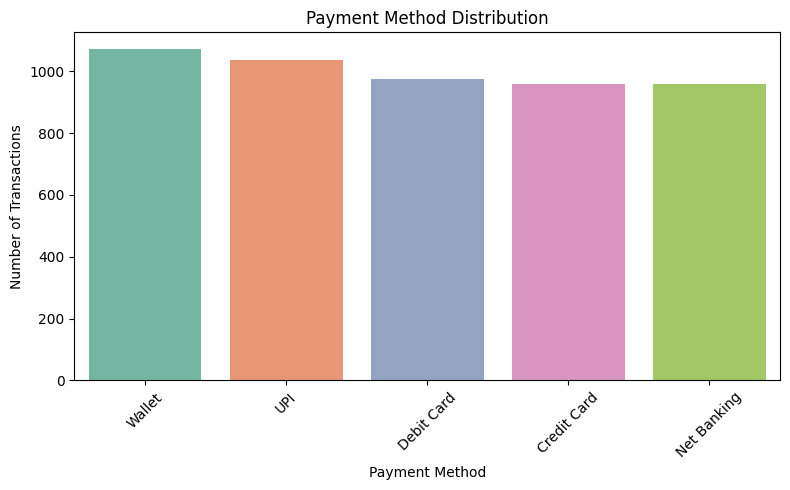

In [39]:
payment_counts = transactions['Transaction_Mode'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set2')
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

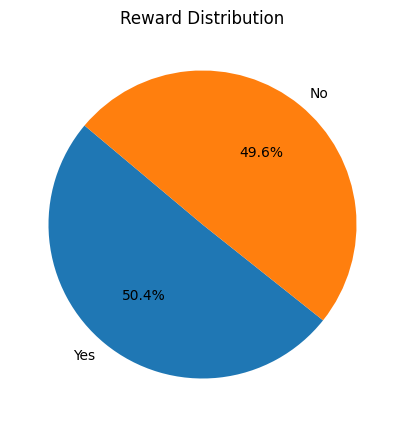

In [40]:
reward_counts = transactions['Reward'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(x=reward_counts.values, labels=reward_counts.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title("Reward Distribution")
plt.show()

/tmp/ipython-input-41-2127867160.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_returned.index.map({0: 'Not Returned', 1: 'Returned'}),


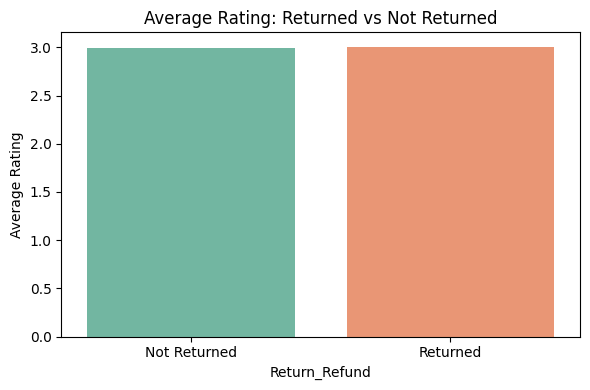

In [41]:
ratings_returns = ratings.merge(returns[['Or_ID', 'Return_Refund']], on='Or_ID', how='left')

# Compare average rating for returned vs non-returned

ratings_returns['Return_Refund'] = ratings_returns['Return_Refund'].fillna(0)
avg_rating_returned = ratings_returns.groupby('Return_Refund')['Prod_Rating'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_rating_returned.index.map({0: 'Not Returned', 1: 'Returned'}),
y=avg_rating_returned.values, palette='Set2')
plt.title("Average Rating: Returned vs Not Returned")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()